In [117]:
from src.plot import plot_single_bath, plot_all_params, save_individual_run, save_bath
from src.fft import plot_conductivity_fft, plot_avg_fft_bars, plot_voltage_fft 
from src.load_data import load_sheet, clean_sheet_with_label

%load_ext autoreload
%matplotlib
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Using matplotlib backend: module://matplotlib_inline.backend_inline


In [86]:
internal_df, sheet1 = load_sheet("Electroplate Experiments Data JUN_JUL", "vary_internal_table")
internal_df = clean_sheet_with_label(internal_df)
internal_df.head()

,run_id,timestamp,time,time_total,area,cathode,anode,mass_SLS,mass_NISO4,mass_NICL2,...,pH,Anomaly P,temperature,Anomaly T,voltage,Anomaly V,current,amp_hour,deposition_rate,bath_id
37094,JUL_22_1,2025-07-22 13:17:40,2,2,67,Brass,Nickel,0.35,270.0,40.0,...,4.02,N,49.70,N,3.639,N,2.342,0.002,0.6329,Bath_3
37095,JUL_22_1,2025-07-22 13:17:42,2,4,67,Brass,Nickel,0.35,270.0,40.0,...,4.02,N,49.70,N,3.705,N,2.342,0.004,0.6329,Bath_3
37096,JUL_22_1,2025-07-22 13:17:44,2,6,67,Brass,Nickel,0.35,270.0,40.0,...,4.02,N,49.71,N,3.702,N,2.342,0.006,0.6329,Bath_3
37097,JUL_22_1,2025-07-22 13:17:46,2,8,67,Brass,Nickel,0.35,270.0,40.0,...,4.02,N,49.68,N,3.673,N,2.342,0.008,0.6329,Bath_3
37098,JUL_22_1,2025-07-22 13:17:49,2,10,67,Brass,Nickel,0.35,270.0,40.0,...,4.02,N,49.69,N,3.668,N,2.342,0.010,0.6329,Bath_3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51429,JUL_24_10,2025-07-24 15:31:42,2,28075,67,Brass,Nickel,0.35,270.0,40.0,...,4.27,,49.98,,3.928,,2.678,20.881,0.7216,Bath_3
51430,JUL_24_10,2025-07-24 15:31:44,2,28077,67,Brass,Nickel,0.35,270.0,40.0,...,4.27,,49.98,,3.937,,2.678,20.882,0.7216,Bath_3
51431,JUL_24_10,2025-07-24 15:31:46,2,28079,67,Brass,Nickel,0.35,270.0,40.0,...,4.27,,49.97,,3.901,,2.678,20.890,0.7216,Bath_3
51432,JUL_24_10,2025-07-24 15:31:48,2,28081,67,Brass,Nickel,0.35,270.0,40.0,...,4.27,,49.98,,3.889,,2.678,20.885,0.7216,Bath_3


/Users/prince_hope/Desktop/pom/python/PlateMon_data_analytics/src/fft.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  condition = (df['bath_id'] == bath_id)
/Users/prince_hope/Desktop/pom/python/PlateMon_data_analytics/src/fft.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  condition = (df['bath_id'] == bath_id)
/Users/prince_hope/Desktop/pom/python/PlateMon_data_analytics/src/fft.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

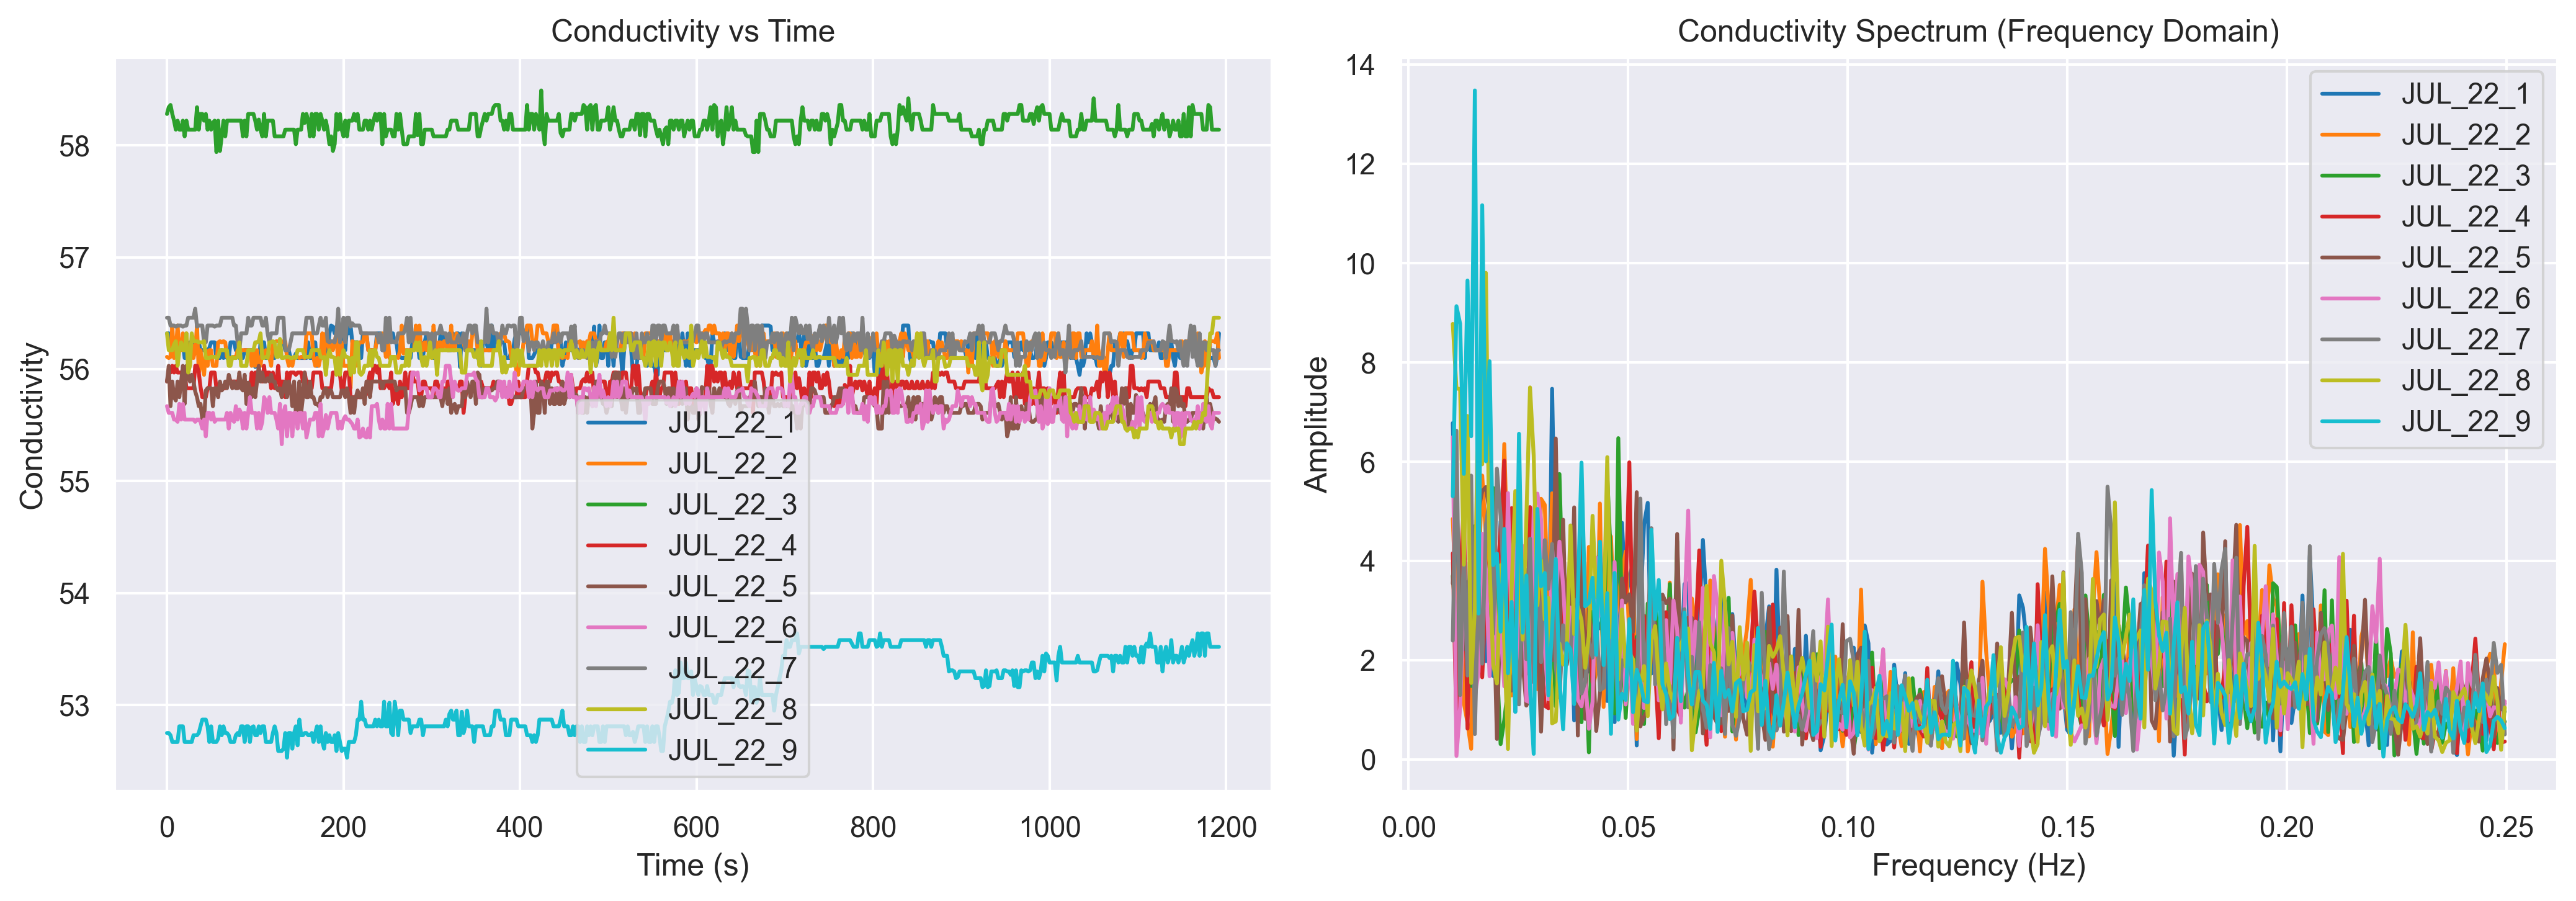

<string>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
<string>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
<string>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
<string>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
<str

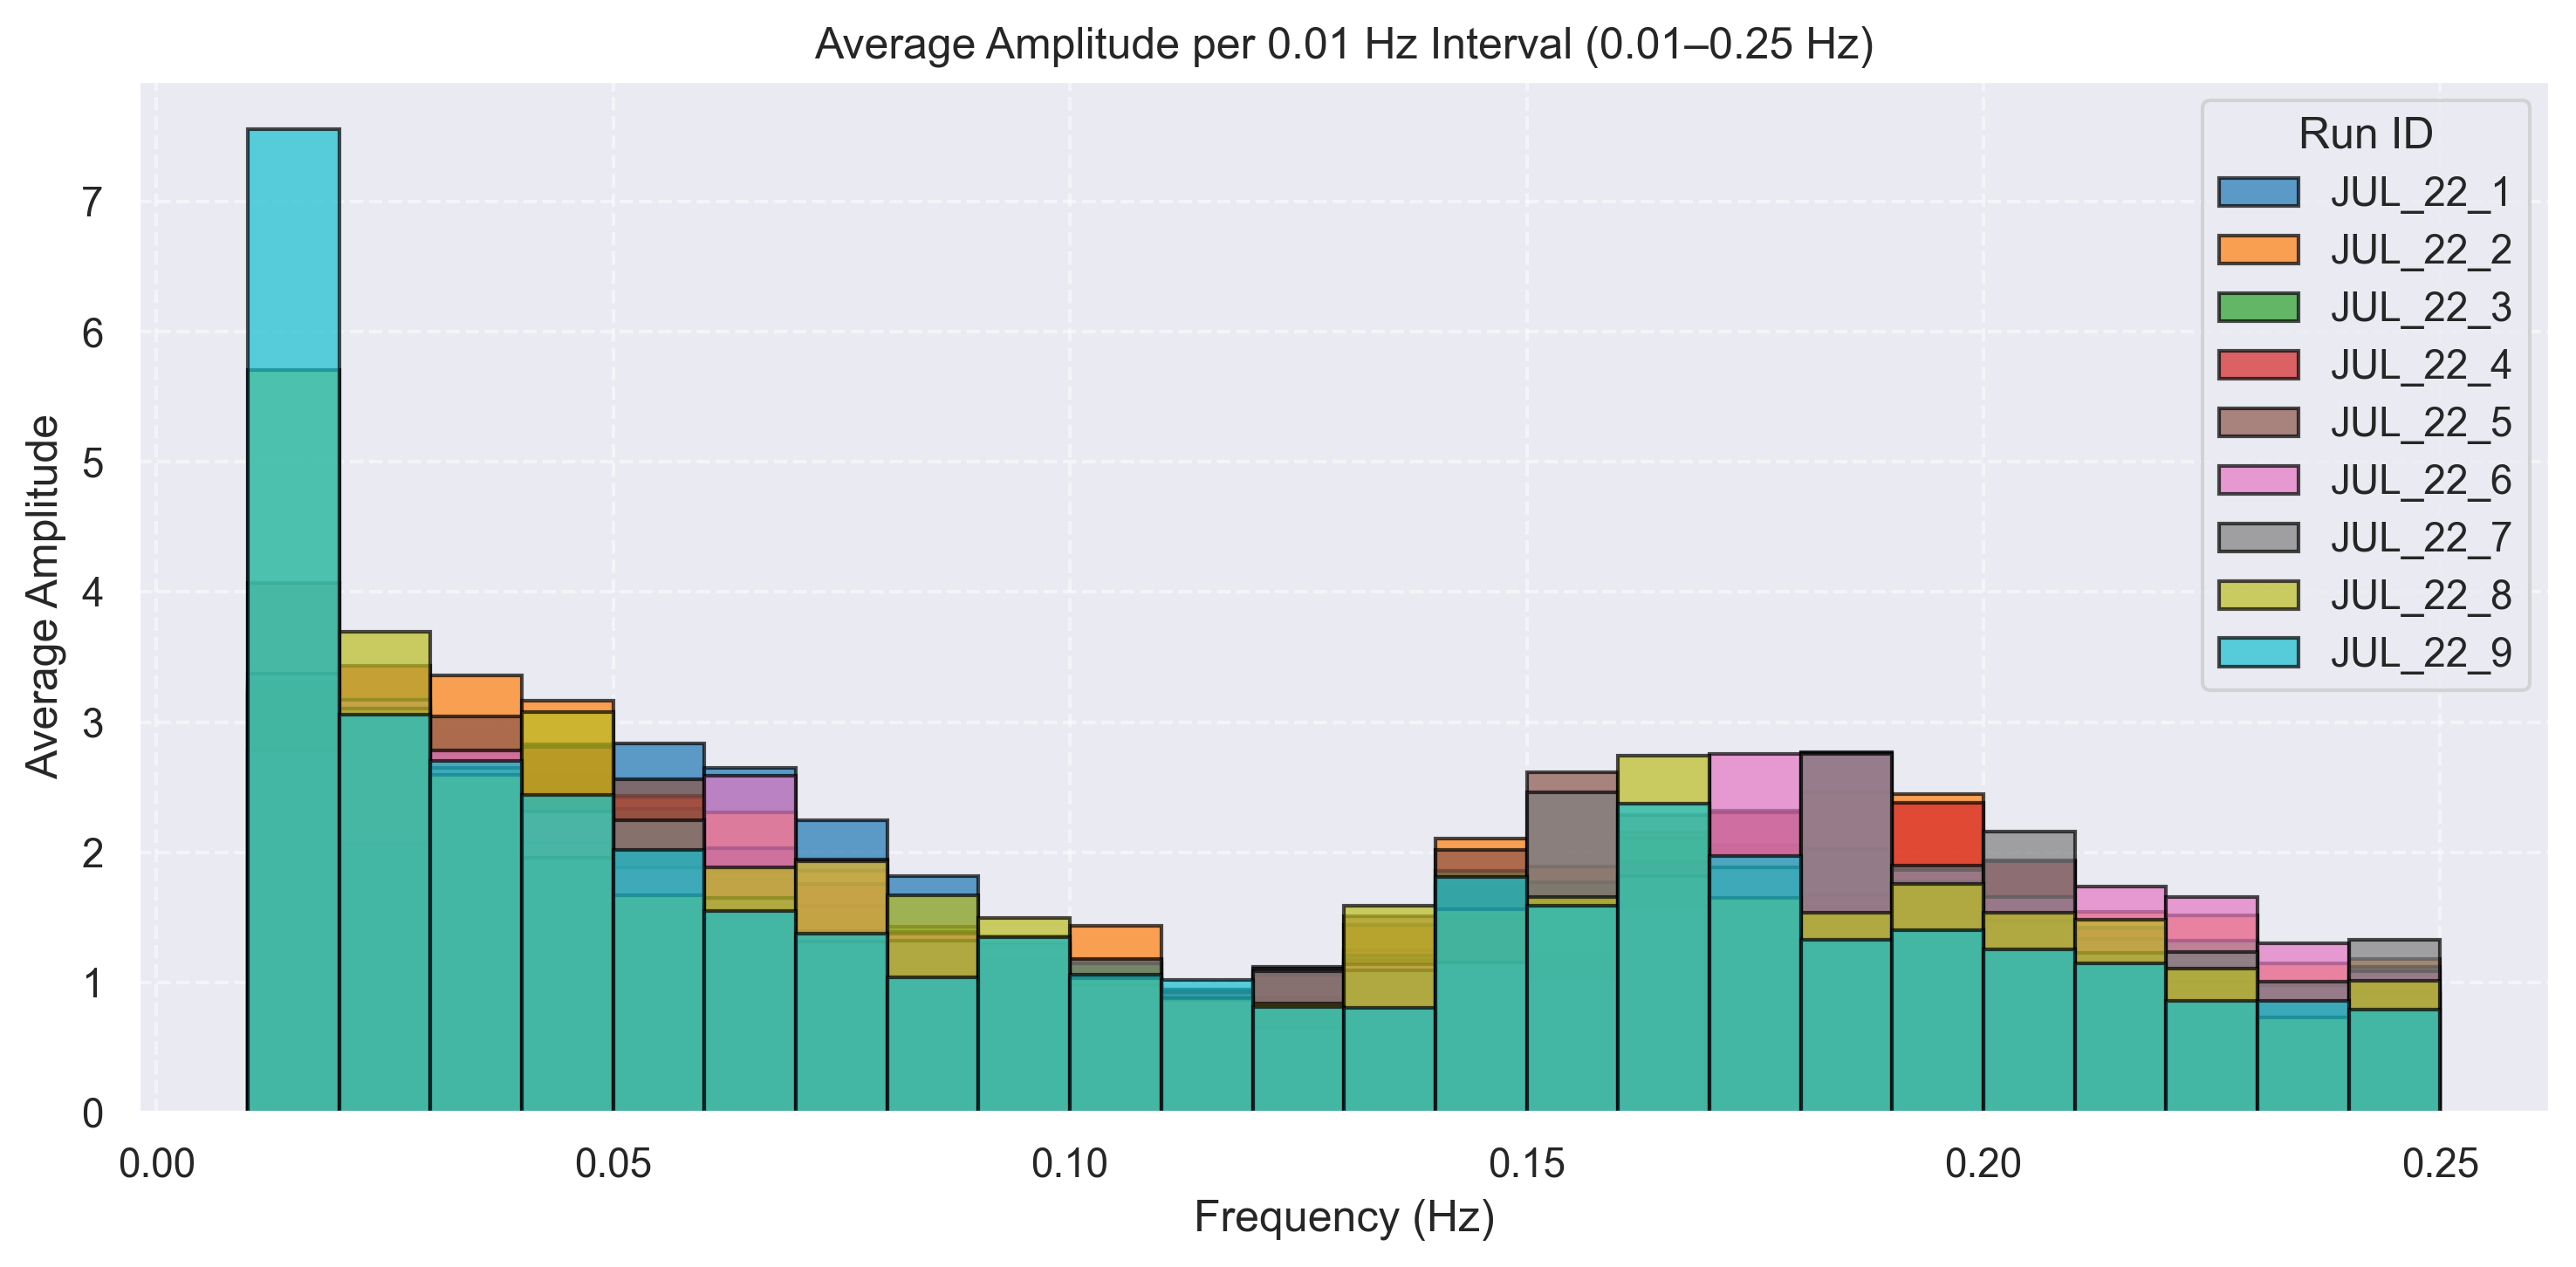

In [81]:
df = plot_conductivity_fft(internal_df,"Bath_3",['JUL_22_1','JUL_22_2','JUL_22_3','JUL_22_4','JUL_22_5','JUL_22_6','JUL_22_7','JUL_22_8','JUL_22_9'])
plot_avg_fft_bars(df)

In [91]:
PARAMS = {
	# Default P' TJ
	# 'pH': [2, 5],
	# 'voltage': [0, 5],
	# Need to change due to the platinum anode cause lower pH and higher voltage
	'pH': [0, 5],
	'voltage': [0, 6],
	'current': [1, 4],
	# 'conductivity': [48, 70],
	'conductivity': [50, 60],
	'temperature': [45, 54]
}

In [284]:
bath_3 = internal_df[internal_df['bath_id']=='Bath_3']
thirty = bath_3.loc[bath_3['time_total']%60 == 2]
full_bath_3 = list(bath_3['run_id'].unique())
plot_all_params(thirty,full_bath_3,PARAMS)
thirty.head()

,run_id,timestamp,time,time_total,area,cathode,anode,mass_SLS,mass_NISO4,mass_NICL2,...,pH,Anomaly P,temperature,Anomaly T,voltage,Anomaly V,current,amp_hour,deposition_rate,bath_id
37094,JUL_22_1,2025-07-22 13:17:40,2,2,67,Brass,Nickel,0.35,270.0,40.0,...,4.02,N,49.70,N,3.639,N,2.342,0.002,0.6329,Bath_3
37124,JUL_22_1,2025-07-22 13:18:41,2,62,67,Brass,Nickel,0.35,270.0,40.0,...,4.02,N,49.75,N,3.464,N,2.342,0.060,0.6329,Bath_3
37154,JUL_22_1,2025-07-22 13:19:41,2,122,67,Brass,Nickel,0.35,270.0,40.0,...,4.02,N,49.80,N,3.414,N,2.342,0.116,0.6329,Bath_3
37184,JUL_22_1,2025-07-22 13:20:41,2,182,67,Brass,Nickel,0.35,270.0,40.0,...,4.02,N,49.85,N,3.355,N,2.343,0.170,0.6329,Bath_3
37214,JUL_22_1,2025-07-22 13:21:41,2,242,67,Brass,Nickel,0.35,270.0,40.0,...,4.02,N,49.88,N,3.281,N,2.343,0.221,0.6329,Bath_3


/Users/prince_hope/Desktop/pom/python/PlateMon_data_analytics/src/fft.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  condition = (df['bath_id'] == bath_id)
/Users/prince_hope/Desktop/pom/python/PlateMon_data_analytics/src/fft.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  condition = (df['bath_id'] == bath_id)
/Users/prince_hope/Desktop/pom/python/PlateMon_data_analytics/src/fft.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

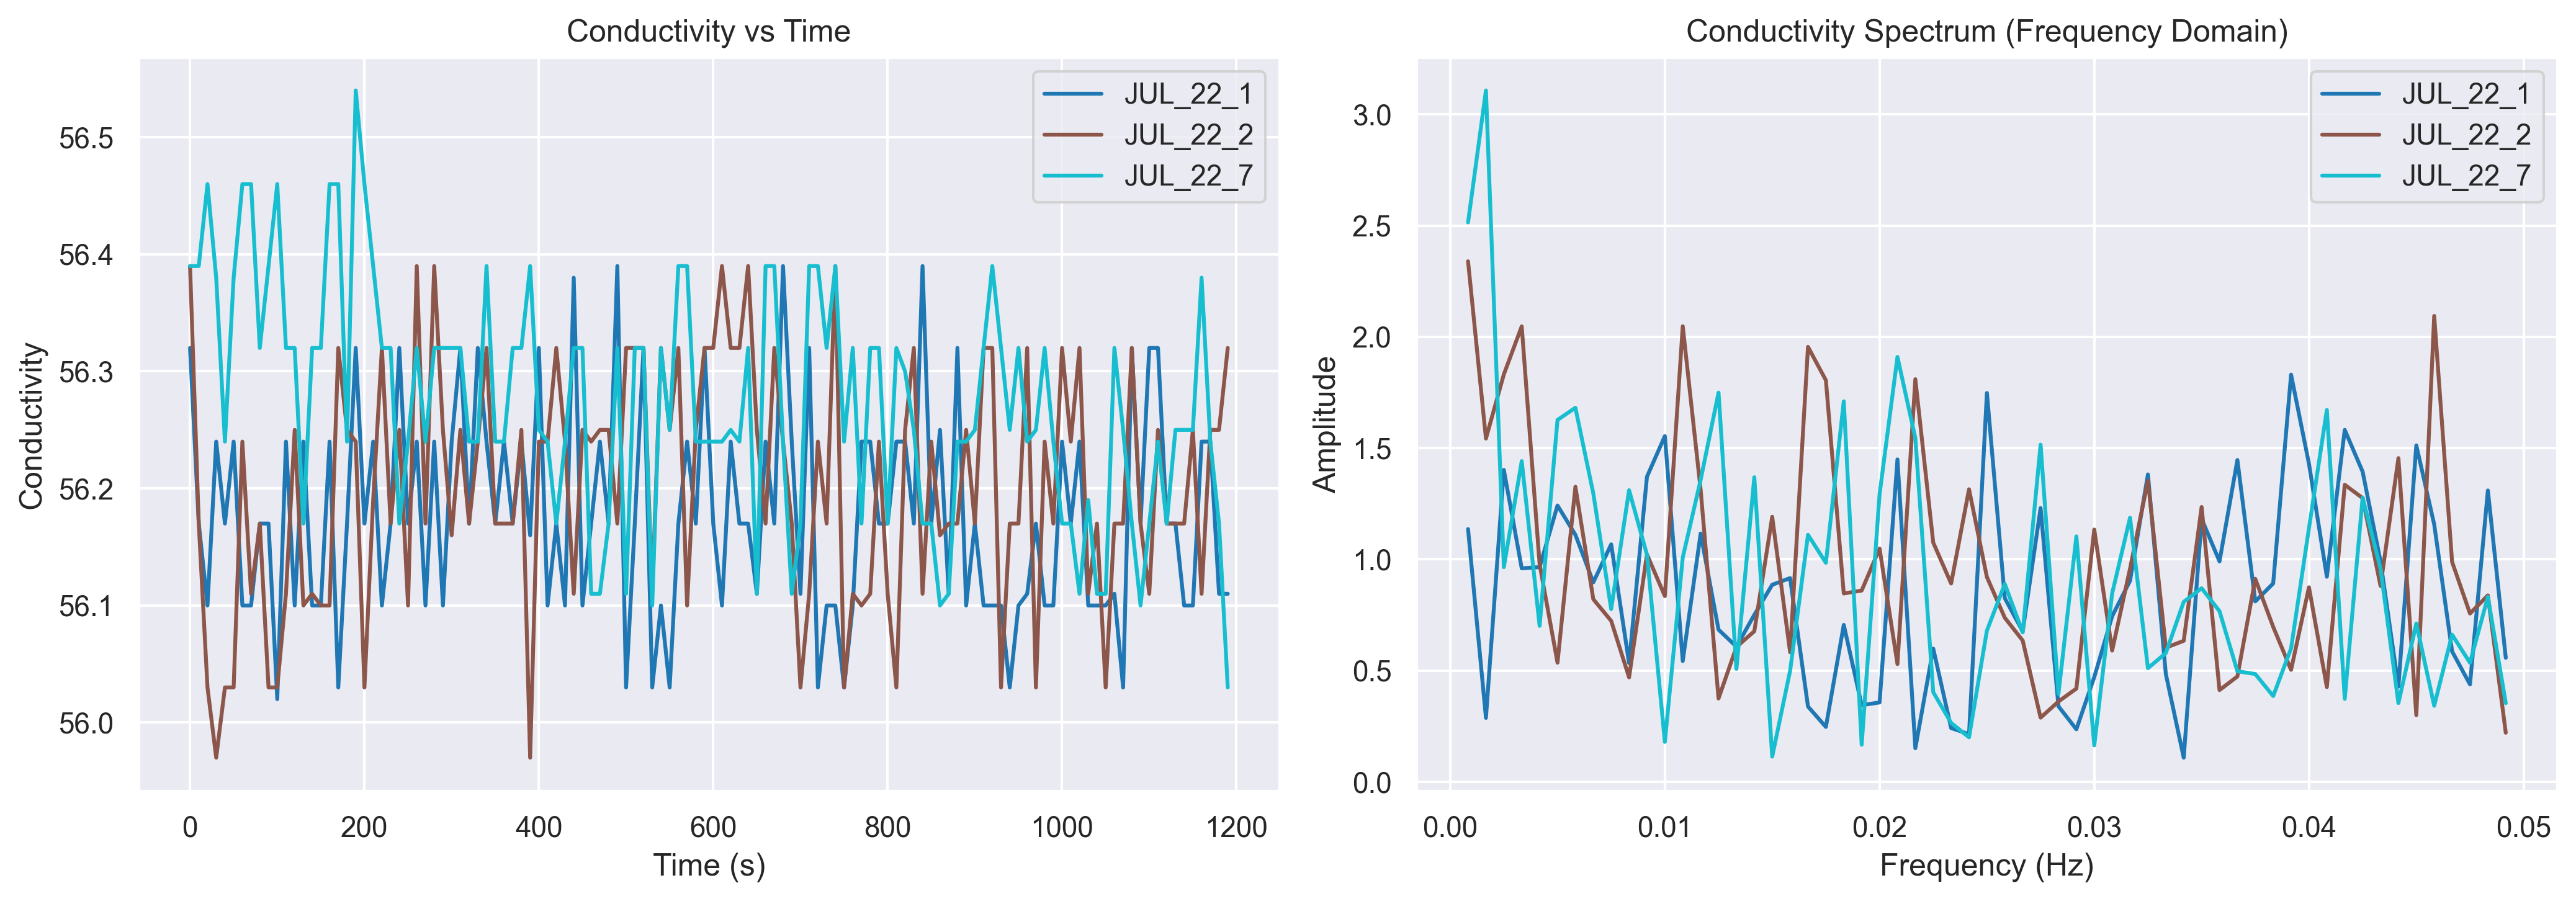

In [213]:
df30 = plot_conductivity_fft(thirty,'Bath_3',['JUL_22_1','JUL_22_2','JUL_22_7'])

In [115]:
df30

,freq_JUL_22_1,fft_vals_JUL_22_1,freq_JUL_22_2,fft_vals_JUL_22_2,freq_JUL_22_3,fft_vals_JUL_22_3
0,0.010050,6.778891,0.010050,4.849201,0.010050,3.700166
1,0.010888,3.045524,0.010888,2.926308,0.010888,2.625433
2,0.011725,1.832435,0.011725,4.136803,0.011725,2.745646
3,0.012563,2.982128,0.012563,1.142219,0.012563,3.367689
4,0.013400,1.809580,0.013400,0.740884,0.013400,2.834981
...,...,...,...,...,...,...
282,0.246231,1.422349,0.246231,2.127263,0.246231,1.679201
283,0.247069,0.481967,0.247069,2.000151,0.247069,0.520352
284,0.247906,1.317005,0.247906,0.432400,0.247906,0.330616
285,0.248744,1.341670,0.248744,1.541487,0.248744,0.716603


<string>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
<string>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
<string>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


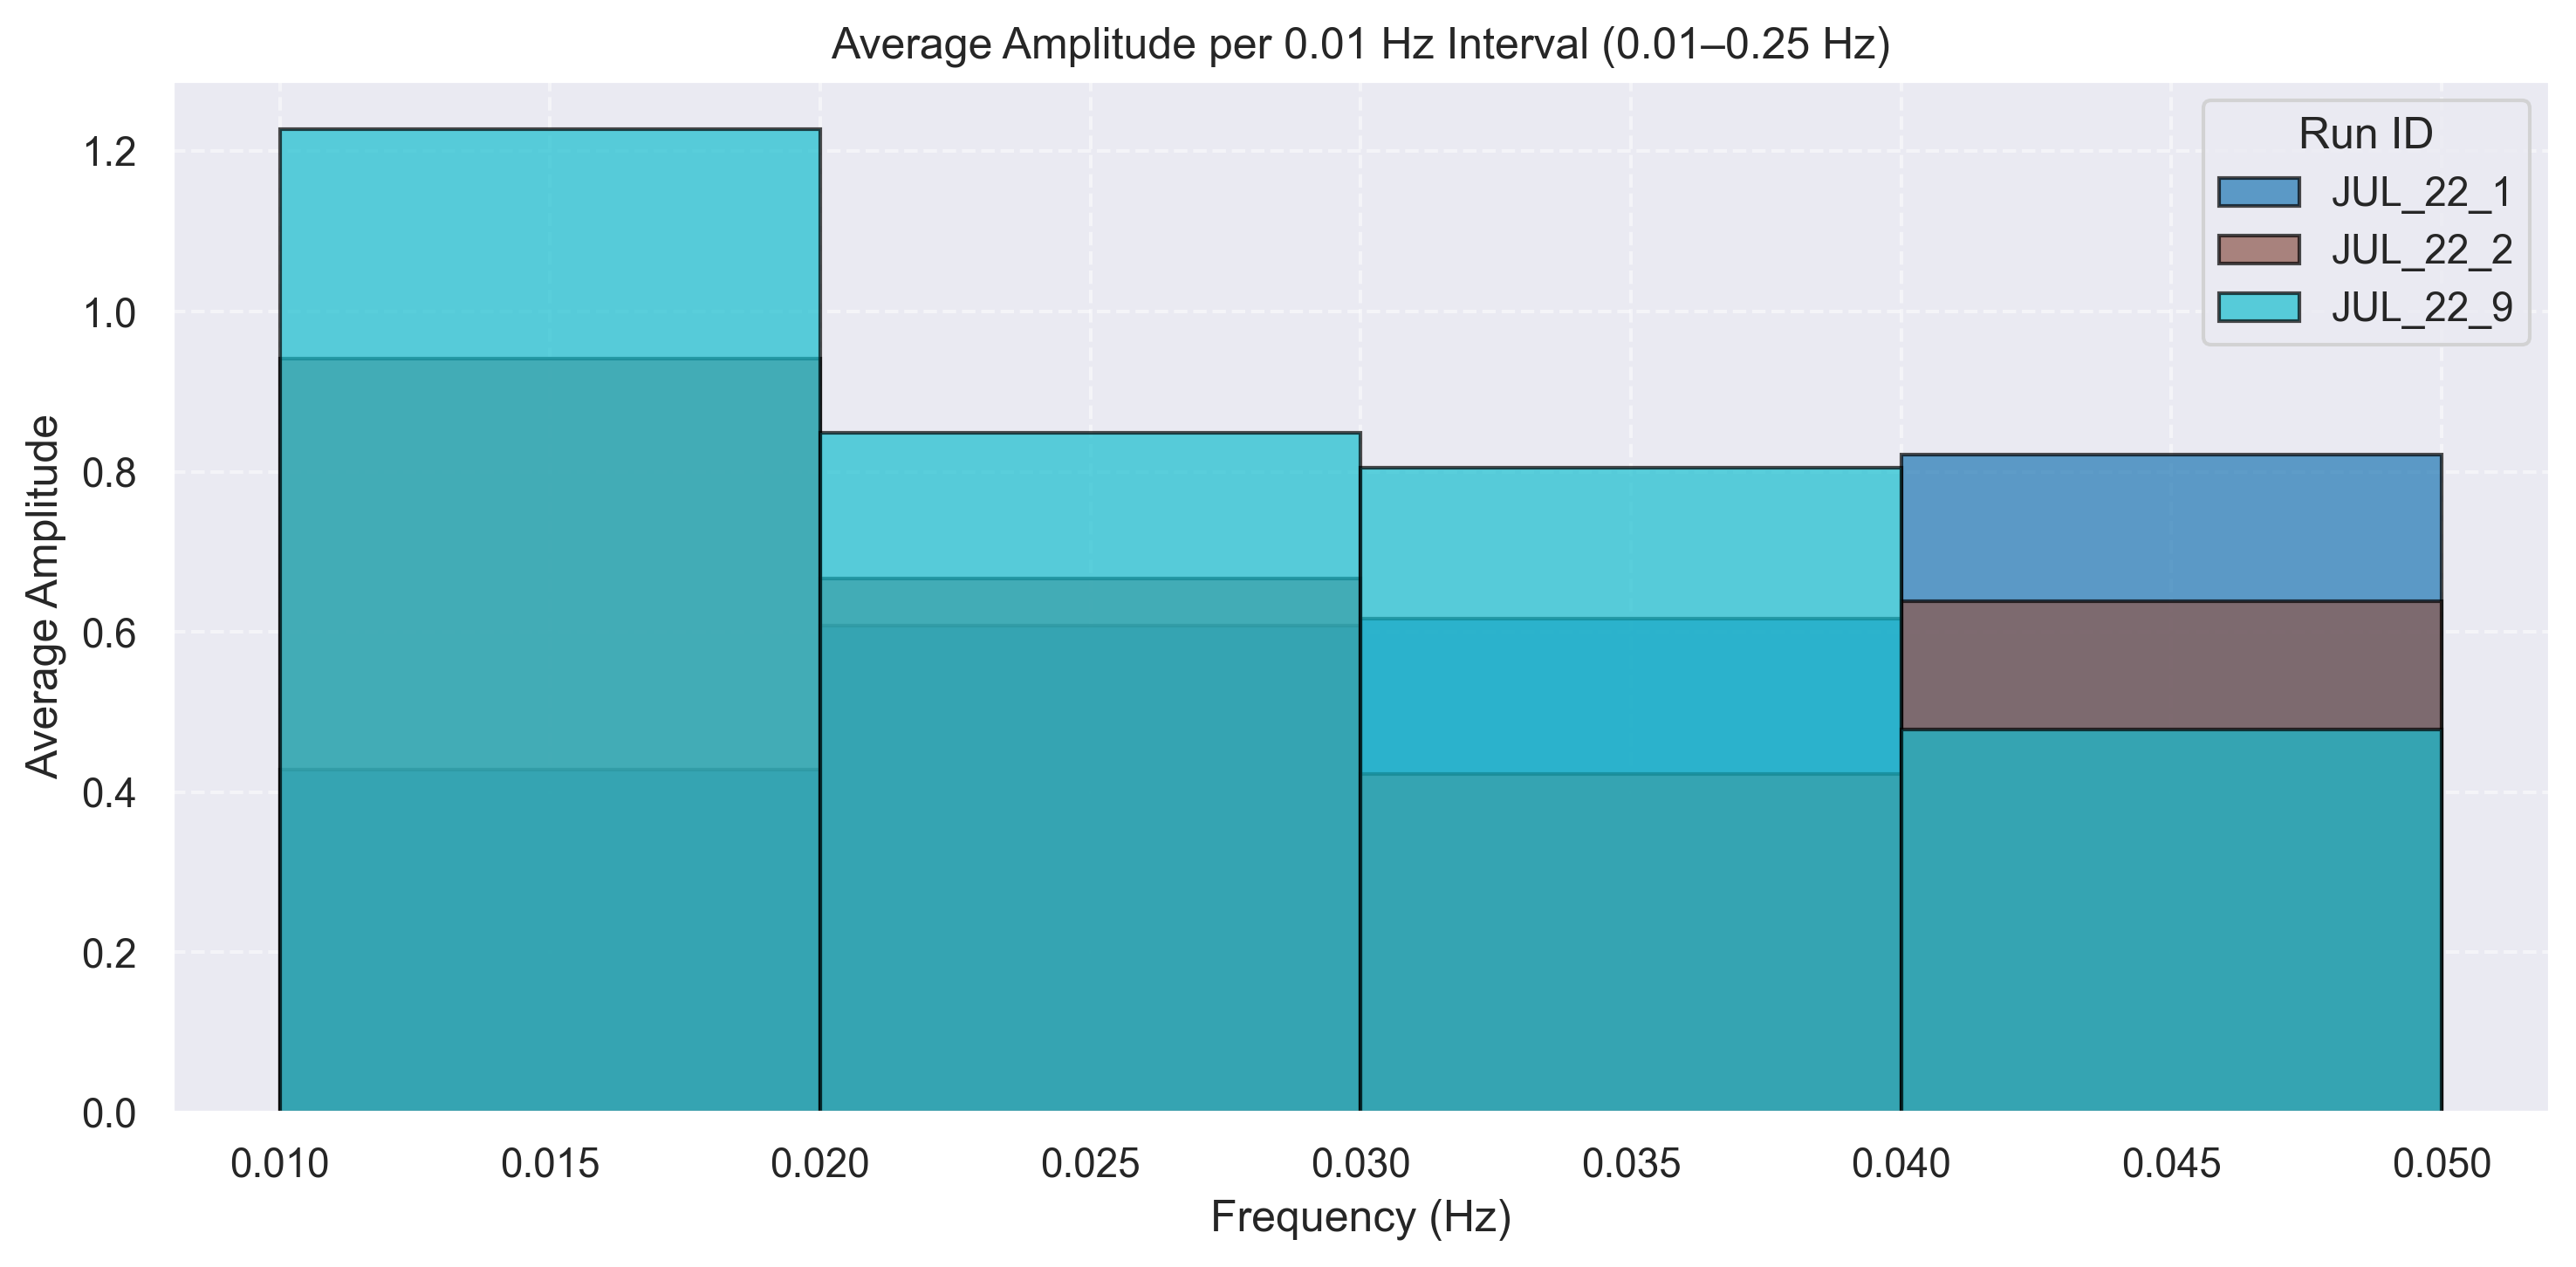

In [205]:
plot_avg_fft_bars(df30)

<string>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<string>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


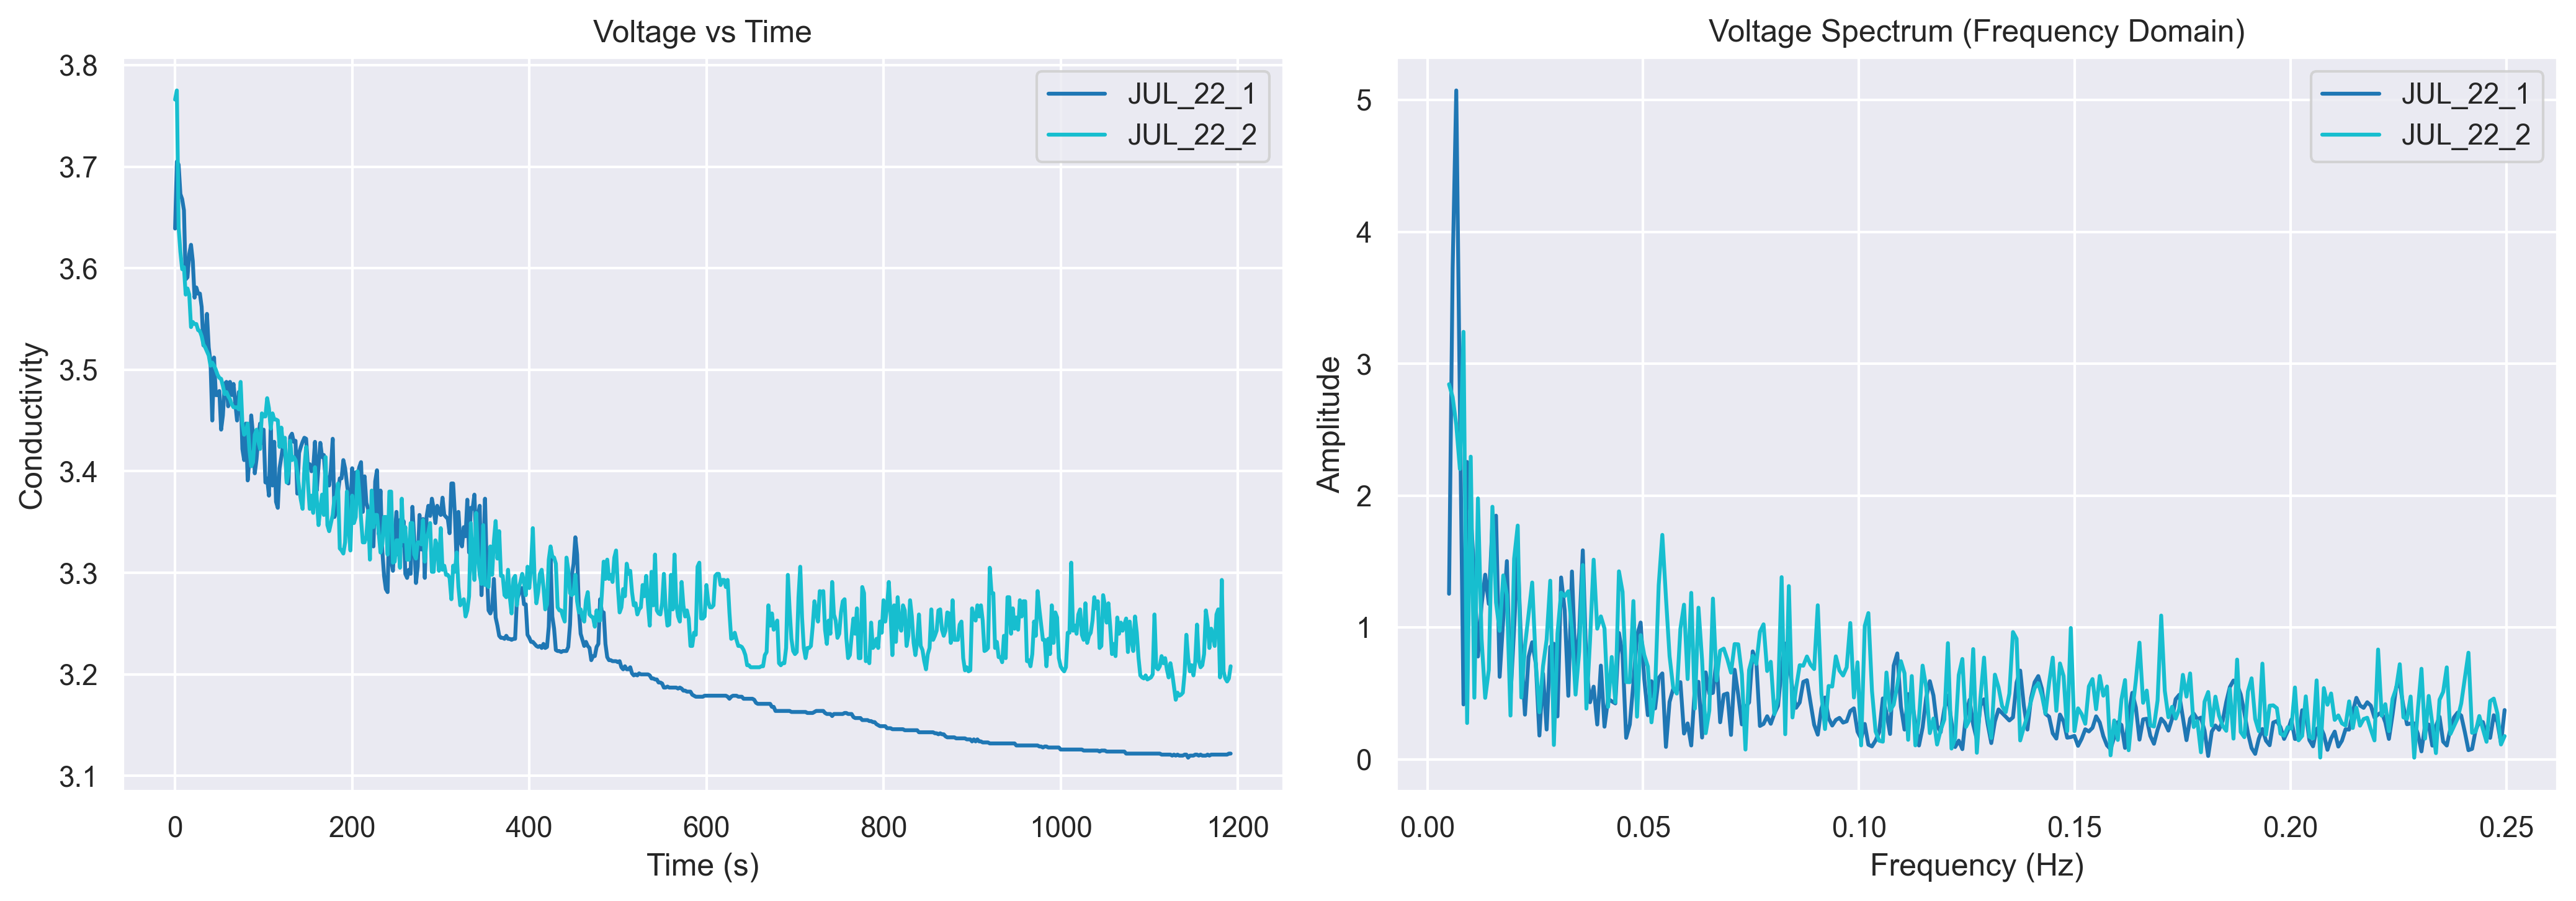

In [227]:
# jul_22_list = [x for x in full_bath_3 if x.startswith('JUL_22')]
voltage_df = plot_voltage_fft(internal_df,"Bath_3",['JUL_22_1','JUL_22_2'])


<string>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
<string>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


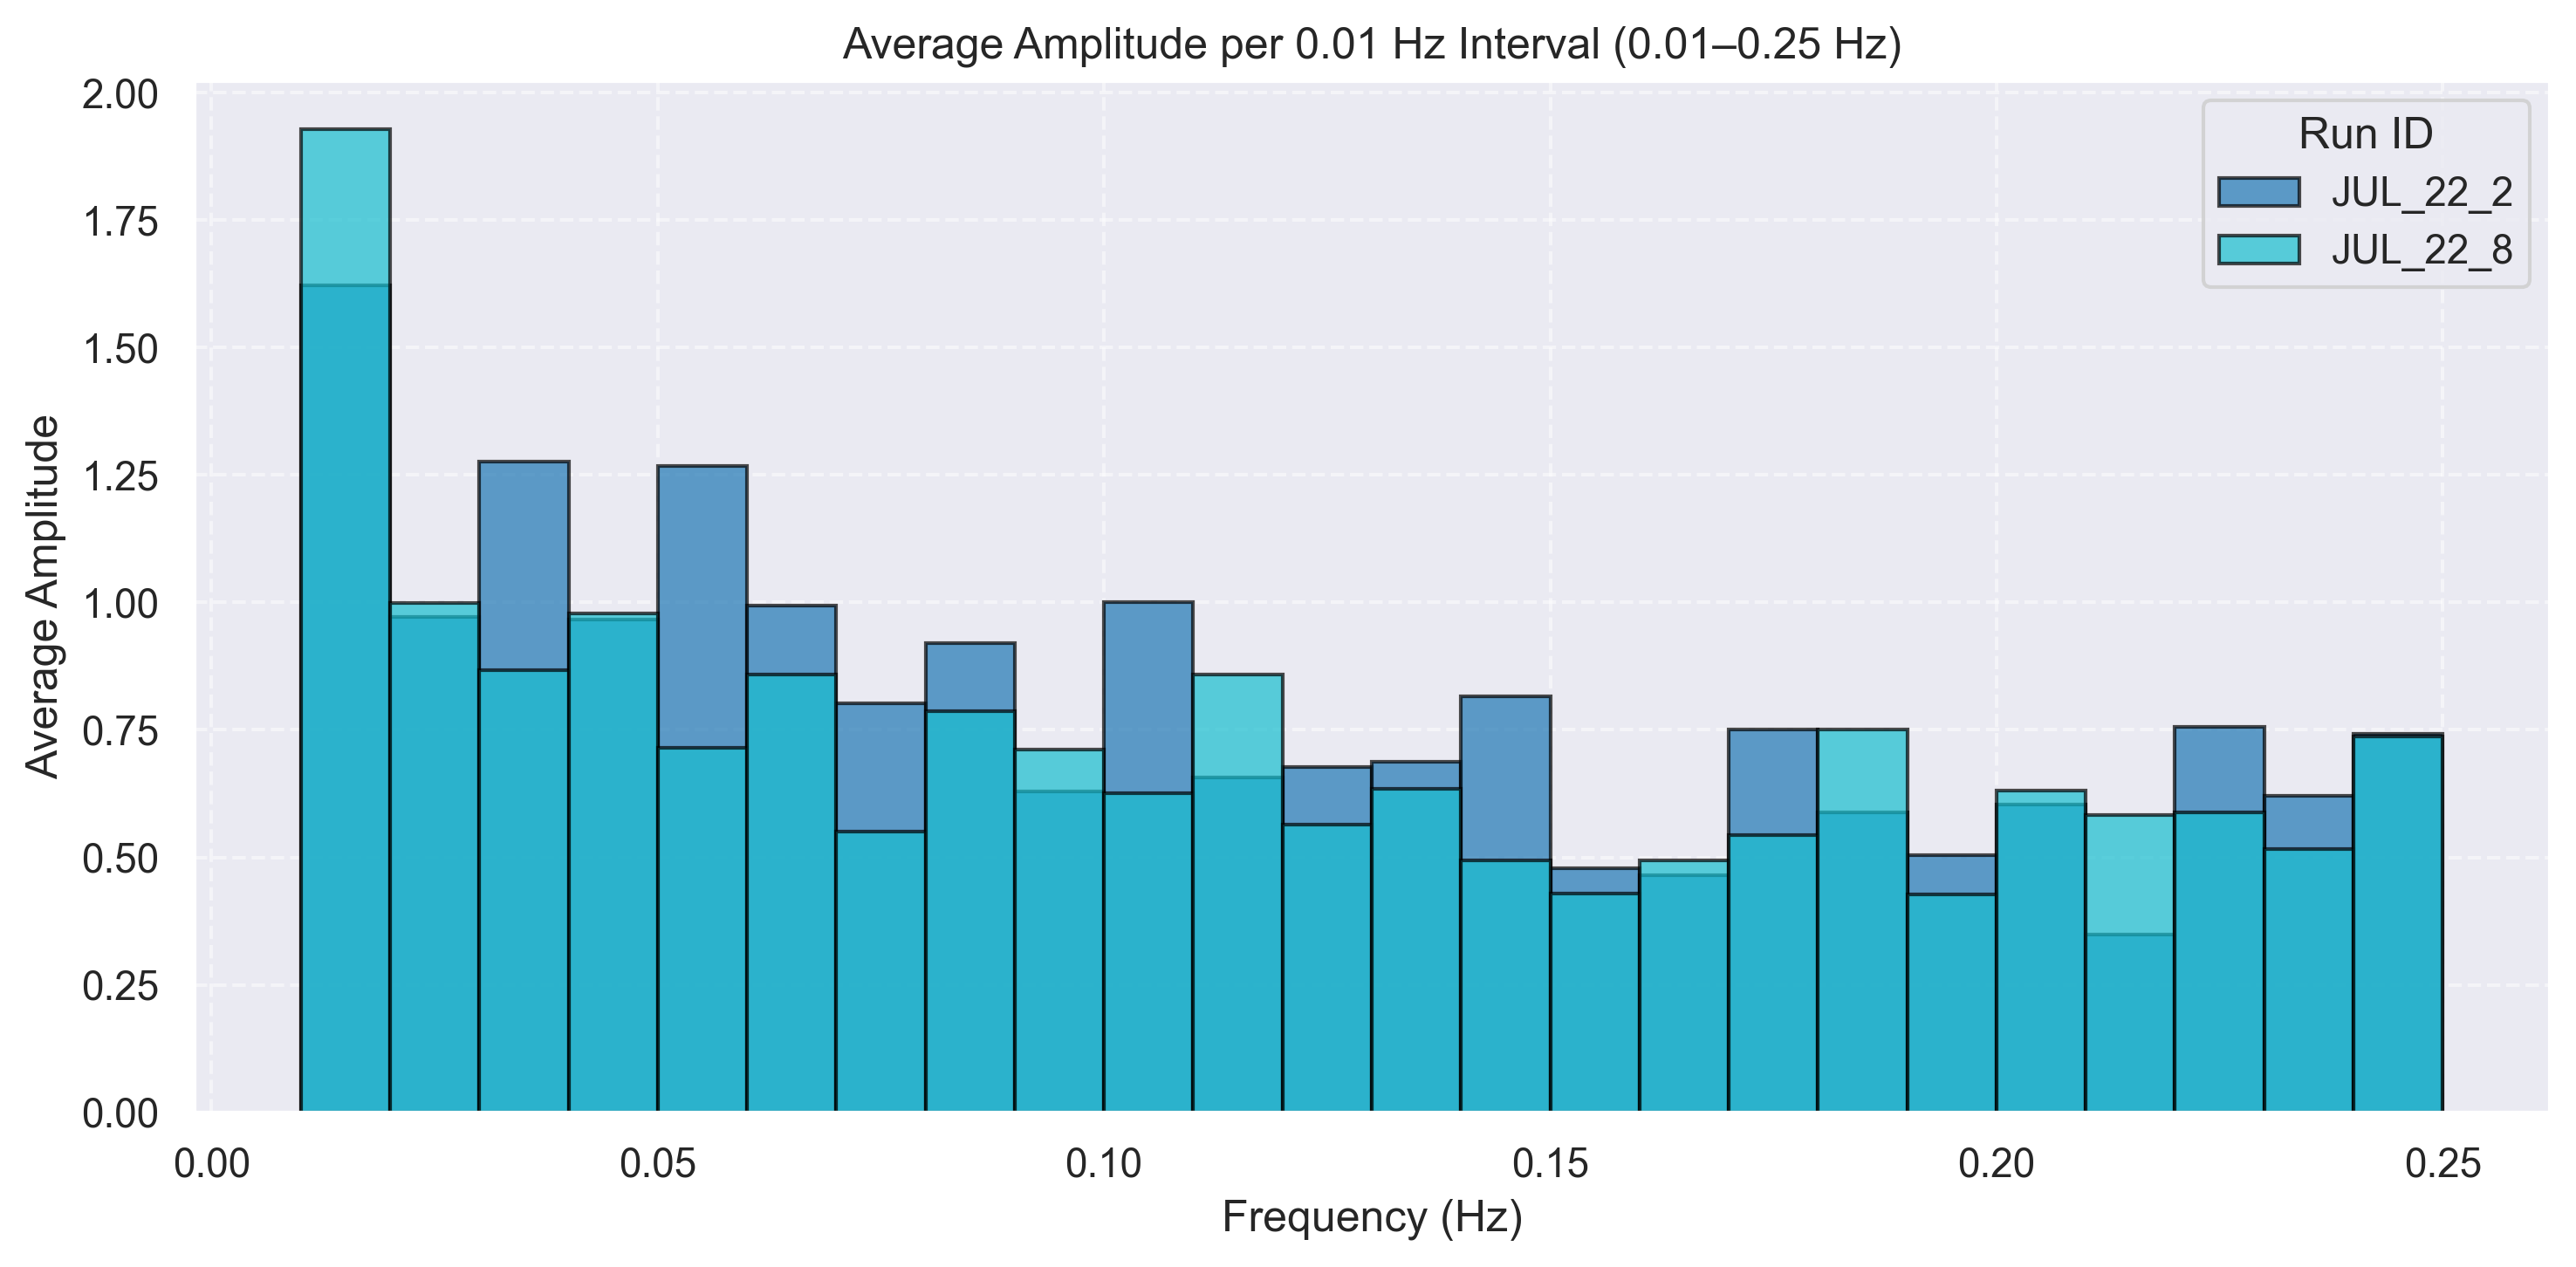

In [222]:
plot_avg_fft_bars(voltage_df)

<string>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<string>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<string>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<string>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

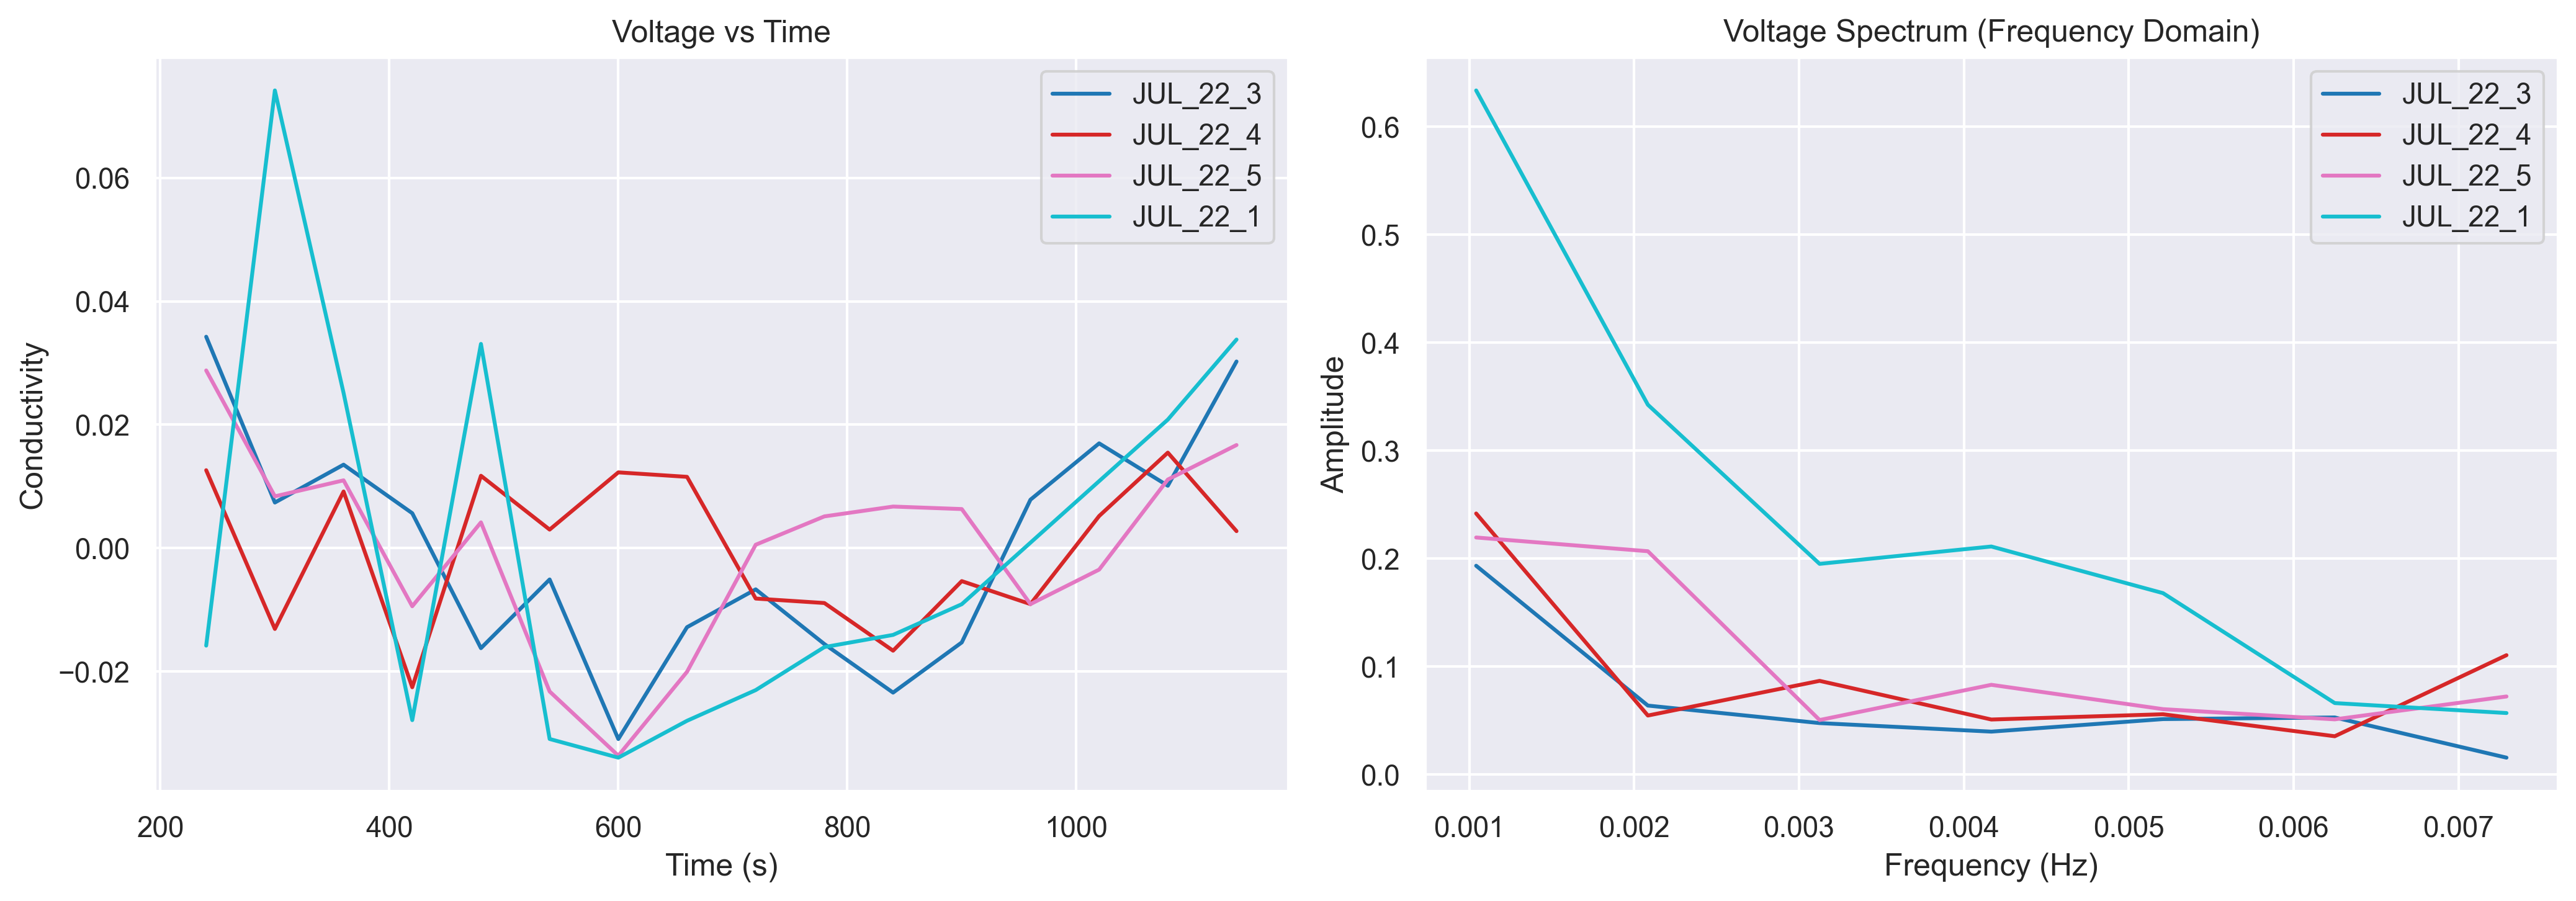

In [286]:
voltage_df2 = plot_voltage_fft(thirty,"Bath_3",['JUL_22_3','JUL_22_4','JUL_22_5','JUL_22_1'])

<string>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
<string>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
<string>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


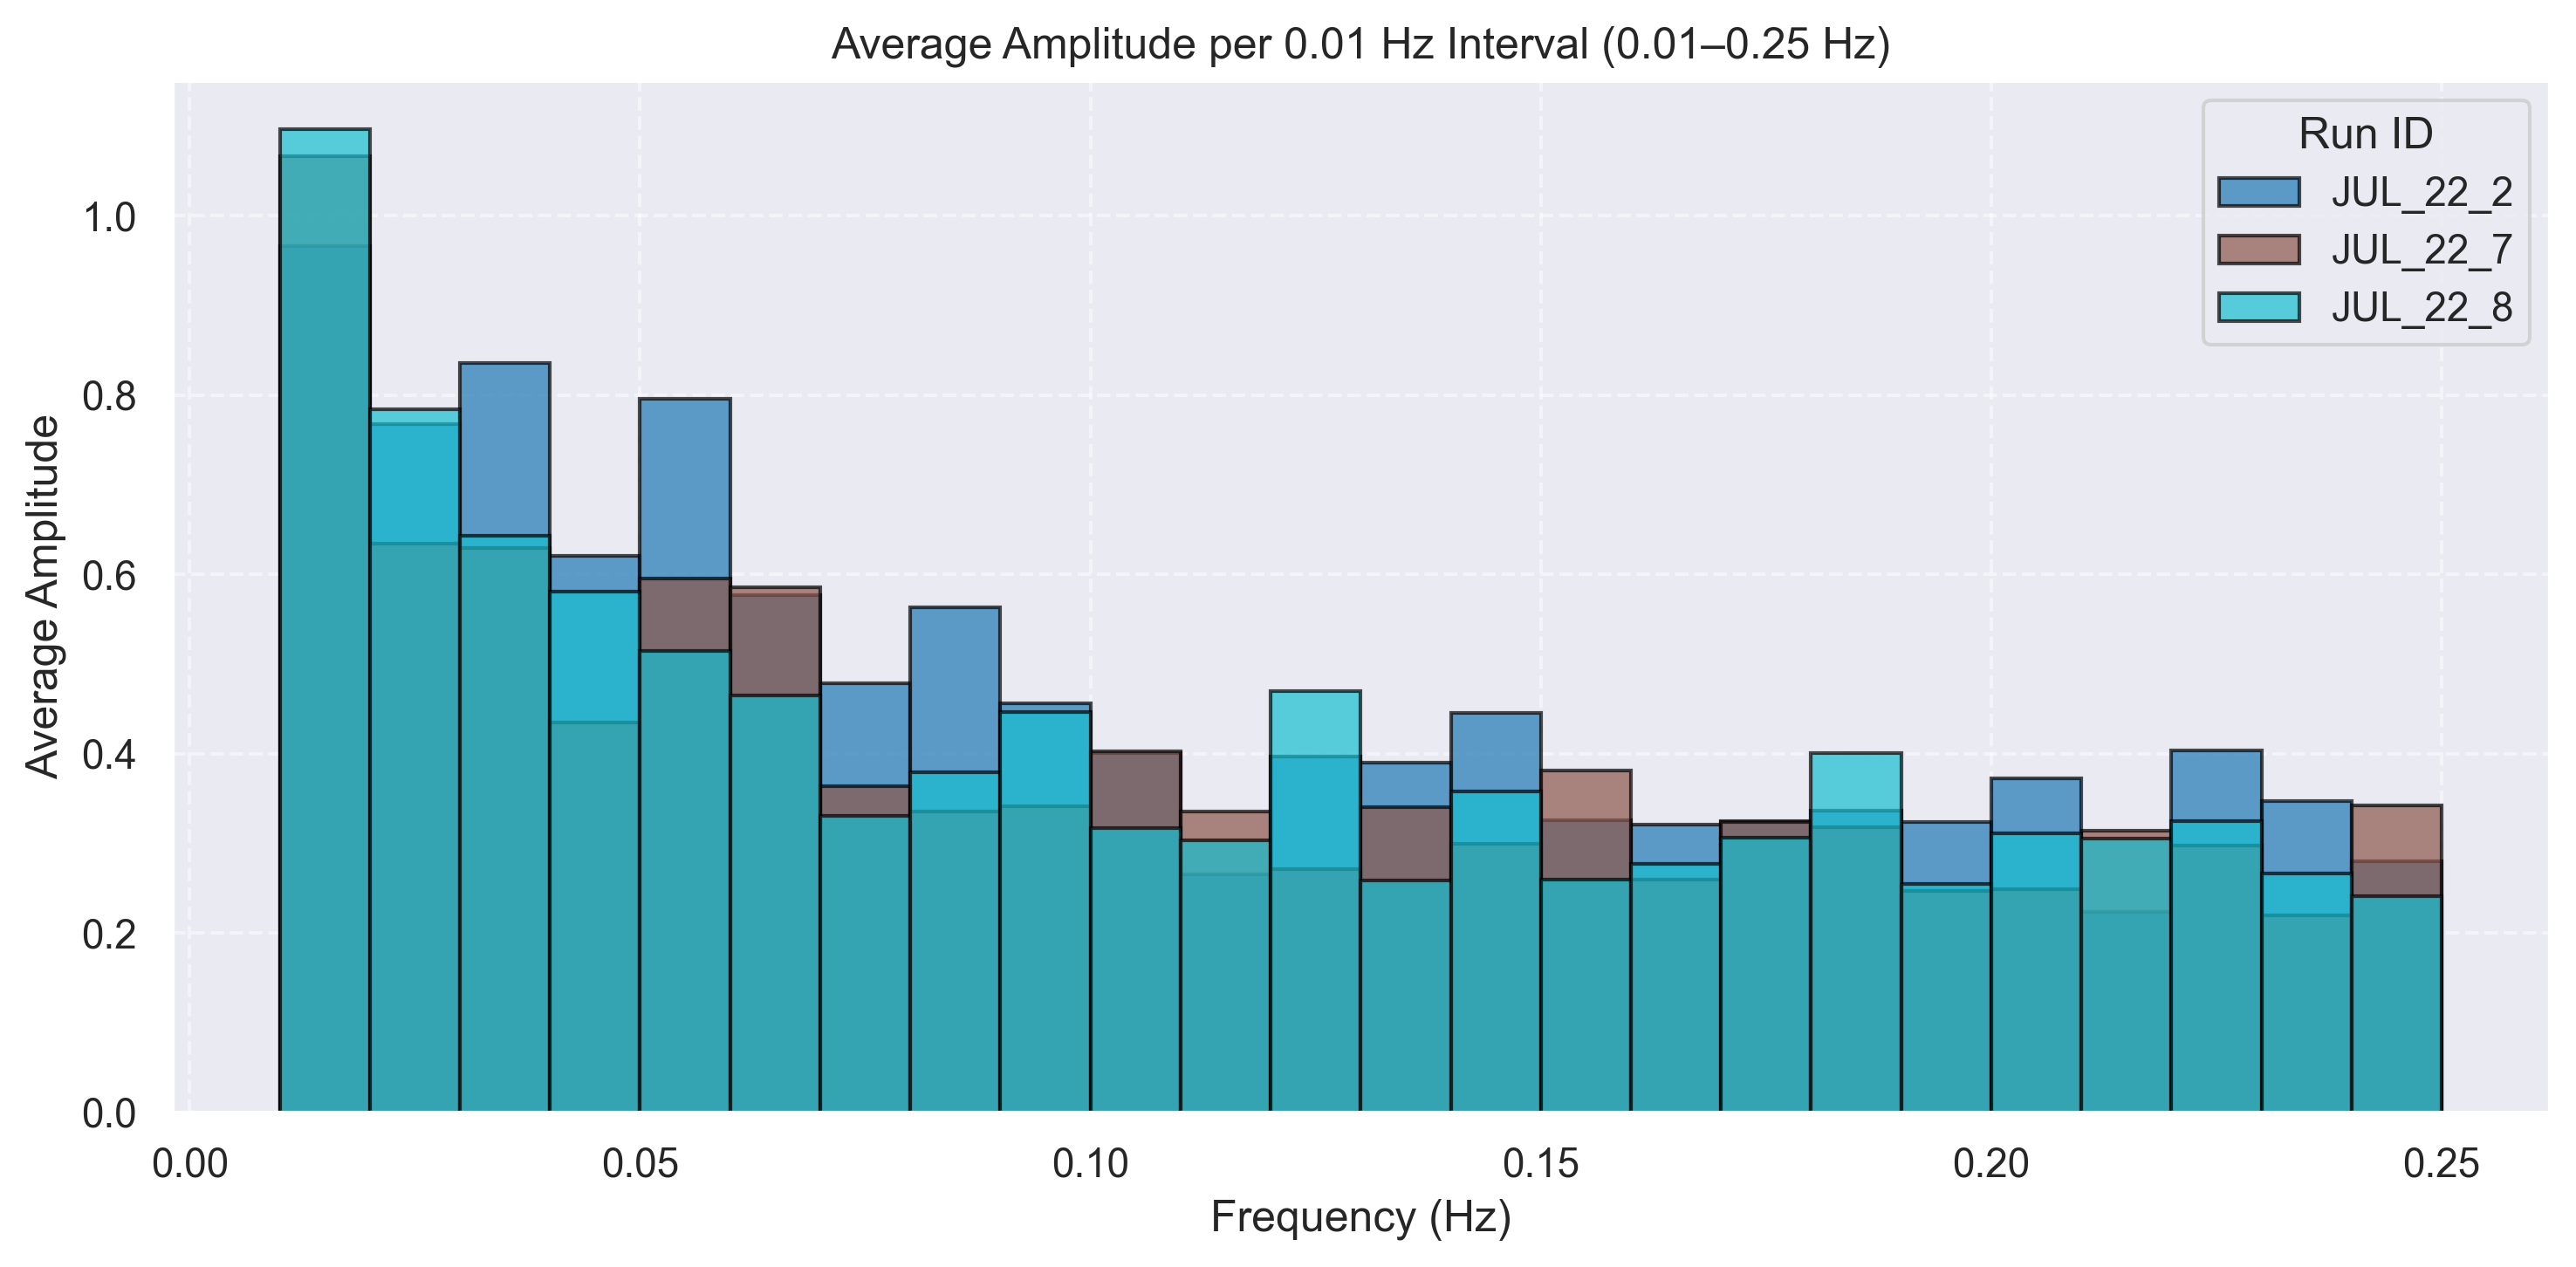

In [270]:
plot_avg_fft_bars(voltage_df2)